In [2]:
#Import Libraries

import pandas as pd
import os
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
data=pd.read_csv('combined_data.csv',low_memory=False)

In [5]:
# To know about data 

data.head()

,Invoice ID,Invoice Status,Customer ID,Due Date,PurchaseOrder,SubTotal,Total,Balance,Adjustment,Expected Payment Date,...,Product ID,SKU,Customer Name,Invoice Date,Invoice Number,Account,Account Code,Sales person,Item Type,Usage Unit
0,209792000000766001,Draft,209792000000762025,2021-01-01,NaN,341.3,341.3,341.3,0.0,NaN,...,2.097920e+17,15YO5QEVG7,THE PUNJABI RASOI (ARK),2021-01-01,INV-004181,Sales,NaN,NaN,NaN,1 Kg
1,209792000000766001,Draft,209792000000762025,2021-01-01,NaN,341.3,341.3,341.3,0.0,NaN,...,2.097920e+17,TBAA4GGYQR,THE PUNJABI RASOI (ARK),2021-01-01,INV-004181,Sales,NaN,NaN,NaN,1 Kg
2,209792000000766001,Draft,209792000000762025,2021-01-01,NaN,341.3,341.3,341.3,0.0,NaN,...,2.097920e+17,WIQ4LRIL33,THE PUNJABI RASOI (ARK),2021-01-01,INV-004181,Sales,NaN,NaN,NaN,1 Kg
3,209792000000766001,Draft,209792000000762025,2021-01-01,NaN,341.3,341.3,341.3,0.0,NaN,...,2.097920e+17,NaN,THE PUNJABI RASOI (ARK),2021-01-01,INV-004181,Sales,NaN,NaN,NaN,NaN
4,209792000000766001,Draft,209792000000762025,2021-01-01,NaN,341.3,341.3,341.3,0.0,NaN,...,2.097920e+17,W4LGBYT5PD,THE PUNJABI RASOI (ARK),2021-01-01,INV-004181,Sales,NaN,NaN,NaN,1 Kg


In [6]:
#Shape of the data

data.shape

(210442, 28)

In [7]:
#To check the null values

data.isnull().sum()

Invoice ID                    0
Invoice Status                0
Customer ID                   0
Due Date                      0
PurchaseOrder            210442
SubTotal                      0
Total                         0
Balance                       0
Adjustment                    0
Expected Payment Date    210442
Last Payment Date         43599
Item Name                     1
Item Desc                210436
Quantity                      0
Discount                      0
Discount Amount               0
Item Total                    0
Item Price                    0
Product ID                    1
SKU                        4167
Customer Name                 0
Invoice Date                  0
Invoice Number                0
Account                       0
Account Code             210442
Sales person             210442
Item Type                210442
Usage Unit                 4145
dtype: int64

In [8]:
# the columns to drop which are not important

columns_to_drop = ['PurchaseOrder','Expected Payment Date','Item Desc','SubTotal','Discount','Discount Amount',
                   'Account Code','Sales person','Item Type','Adjustment','Balance']
data = data.drop(columns_to_drop, axis=1)


In [9]:
#Replace the null values

data['Usage Unit'].fillna(data['Usage Unit'].sample(n=1).values[0], inplace=True)
data.dropna(subset=['Item Name'], inplace=True)
data.drop('SKU', axis=1, inplace=True)

In [10]:
#Replace the null values

data['Due Date'] = pd.to_datetime(data['Due Date'])
data['Last Payment Date'] = pd.to_datetime(data['Last Payment Date'])

difference = timedelta(days=10)

data['Last Payment Date'] = data['Last Payment Date'].fillna(data['Due Date'] + difference)

In [12]:
# Taking out month from the Date & adding as a new column

data['Month'] = pd.to_datetime(data['Invoice Date']).dt.month
data['Year'] = pd.to_datetime(data['Last Payment Date']).dt.year

In [13]:
data.corr()

,Invoice ID,Customer ID,Total,Quantity,Item Total,Item Price,Product ID,Month,Year
Invoice ID,1.000000,0.502221,0.135715,0.011970,0.066347,0.313595,0.503084,0.864751,0.270607
Customer ID,0.502221,1.000000,-0.045044,-0.034142,-0.017159,0.144082,0.309477,0.446160,0.133940
Total,0.135715,-0.045044,1.000000,0.326696,0.383215,0.084091,0.063884,0.121892,-0.019899
Quantity,0.011970,-0.034142,0.326696,1.000000,0.730227,-0.096600,0.028340,0.019155,-0.019094
Item Total,0.066347,-0.017159,0.383215,0.730227,1.000000,0.045311,0.036531,0.057533,-0.009124
Item Price,0.313595,0.144082,0.084091,-0.096600,0.045311,1.000000,0.120429,0.257841,0.092628
Product ID,0.503084,0.309477,0.063884,0.028340,0.036531,0.120429,1.000000,0.583833,0.118663
Month,0.864751,0.446160,0.121892,0.019155,0.057533,0.257841,0.583833,1.000000,0.205762
Year,0.270607,0.133940,-0.019899,-0.019094,-0.009124,0.092628,0.118663,0.205762,1.000000


<AxesSubplot:>

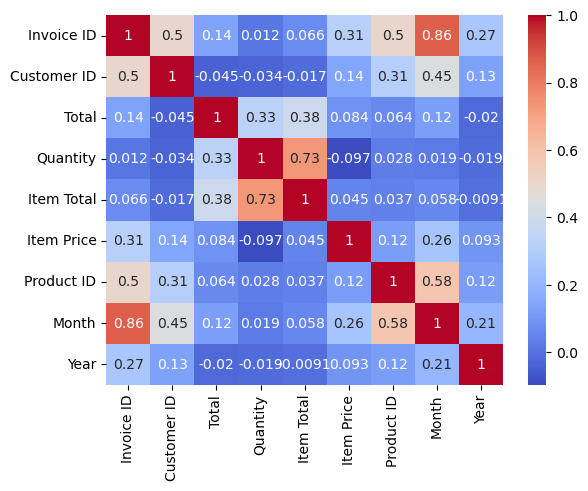

In [14]:

sns.heatmap(data.corr(),cmap='coolwarm', annot=True)

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'X' is your feature matrix and 'y' is your target variable
X=data[['Invoice ID','Customer ID','Product ID']]
y=data['Month']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model by calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 11.251685602010813


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'X' is your feature matrix and 'y' is your target variable
X=data[['Item Total','Total','Month','Item Price']]
y=data['Quantity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)
                                                                                                    
# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model by calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 3.4216484027637106
